<font size="+3.8">Foxf2 Expression per Cell Type</font>  
<font size="+1.5"></font>  

sfrerich

Aim: Combine and plot Foxf2 expression from processed scRNA-seq studies. Processing see separate scripts.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
from datetime import date
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
sc.settings.verbosity = 3

In [3]:
main_dir='/run/user/1000/gvfs/smb-share:server=138.245.4.35,share=bd-dichgans/SF' # Linux
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win

# Foxf2

## Load data

In [87]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized' 
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230228_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230227_Vanlandewijck2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230228_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230228_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230301_TabulaMuris2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230301_Heindl2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230301_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenche

In [88]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [89]:
all

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,ECs,0.291276,0.107273,FOXF2,Winkler2022,Human,4950
1,Fibroblasts,0.403376,0.153991,FOXF2,Winkler2022,Human,3721
2,Fibromyocytes,0.033961,0.021365,FOXF2,Winkler2022,Human,4353
3,Pericytes,1.000000,0.355623,FOXF2,Winkler2022,Human,329
4,SMCs,0.000000,0.010474,FOXF2,Winkler2022,Human,41150
...,...,...,...,...,...,...,...
81,Neurons,0.042747,0.013643,FOXF2,Siletti2022,Human,2455885
82,OPCs,0.000568,0.000350,FOXF2,Siletti2022,Human,105734
83,Oligos,0.000069,0.000101,FOXF2,Siletti2022,Human,494966
84,Pericytes,1.000000,0.216084,FOXF2,Siletti2022,Human,3693


In [90]:
all.source.unique()

array(['Winkler2022', 'Vanlandewijck2018', 'Zeisel2018', 'Yang2022',
       'TabulaMuris2018', 'Heindl2022', 'Saunders2018', 'Garcia2022',
       'Siletti2022'], dtype=object)

In [91]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia',
 'Oligos',
 'Ependymal cells',
 'Olfactory ensheathing cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Leptomeningeal cells',
 'T cells',
 'Unknown',
 'Neuronal stem cells',
 'Immune_Other',
 'Neurogenesis',
 'Choroid plexus epithelial cells',
 'Macrophages']

## Format

### Remove celltypes

In [93]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']

### Rename Oligos

In [94]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [95]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia',
 'Oligodendrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Neuronal stem cells',
 'Neurogenesis',
 'Macrophages']

In [96]:
all = all.replace("Microglia","Microglia/Mφ")

In [97]:
all = all.replace("Macrophages","Microglia/Mφ")

In [98]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [99]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'OPCs',
 'Neuronal stem cells',
 'Neurogenesis']

### Group Neuroblasts/Neuronal stem cells

In [100]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [101]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")

In [102]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
18,Neuroblasts/NSCs,0.000000,0.000000,Foxf2,Zeisel2018,Mouse,5466
42,Neuroblasts/NSCs,0.000000,0.000000,Foxf2,TabulaMuris2018,Mouse,36
60,Neuroblasts/NSCs,0.001688,0.000499,Foxf2,Saunders2018,Mouse,4008


### Rename ECs

In [103]:
# rename ECs to Endothelial cells

In [104]:
all2 = all

In [105]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [108]:
all2.clusters.unique().tolist()

['Endothelial cells',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'OPCs']

In [109]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [110]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [111]:
all2 = all2.sort_values("clusters")

### Rename studies

In [112]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
55,Astrocytes,0.002088,0.000465,Foxf2,Saunders2018,Mouse,51571
45,Astrocytes,0.001149,0.001277,Foxf2,Heindl2022,Mouse,783
5,Astrocytes,0.000066,0.044000,Foxf2,Vanlandewijck2018,Mouse,250
44,Astrocytes,0.001768,0.004619,Foxf2,TabulaMuris2018,Mouse,433
66,Astrocytes,0.000000,0.001673,FOXF2,Garcia2022,Human,11954
...,...,...,...,...,...,...,...
60,Neuroblasts/NSCs,0.001688,0.000499,Foxf2,Saunders2018,Mouse,4008
57,Ependymal cells,0.000000,0.000000,Foxf2,Saunders2018,Mouse,2022
13,Ependymal cells,0.000000,0.000000,Foxf2,Zeisel2018,Mouse,1419
78,Ependymal cells,0.002025,0.000680,FOXF2,Siletti2022,Human,5882


In [113]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [114]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [115]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [116]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [117]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [118]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [119]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [120]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [121]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [122]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [123]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12092\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


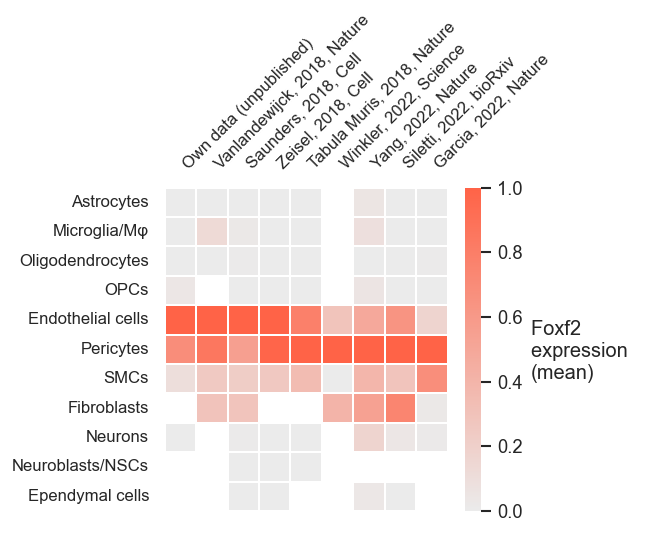

In [124]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title='Foxf2 \nexpression \n(mean)', frameon=False)
    plt.show()

## Dotplot

In [125]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12092\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [126]:
#all2.columns = ['clusters', 'Mean', 'Fraction of cells', 'gene', 'source','organism', 'cell_number']

In [127]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [128]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [129]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(7.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)


# position sns legend
leg = pl._legend
leg.set_bbox_to_anchor([1.5,0.53])
#leg.set_title("Foxf2")
leg.remove();

# Mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.85, bbox_to_anchor=(1.68,0.872), title="Foxf2", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

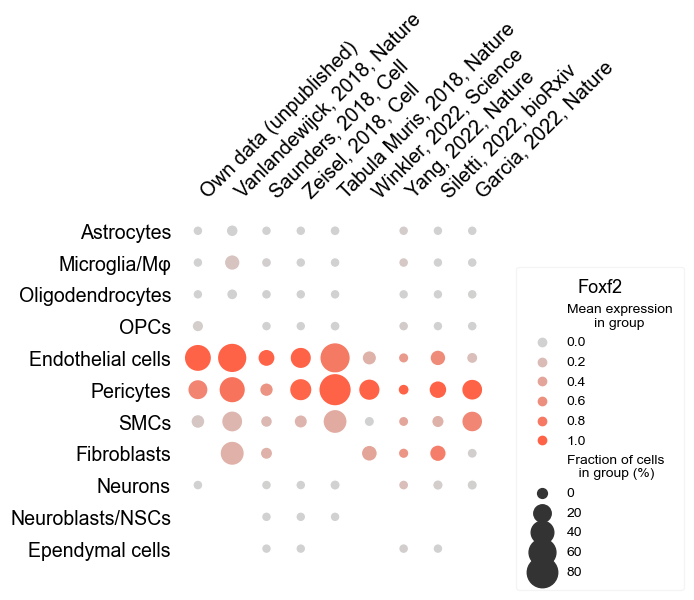

In [130]:
plt.show()

In [86]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_a.png', dpi=500)

In [87]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_a.svg', dpi=500)

In [88]:
# format legend as in scanpy.pl.dotplot() manually
# use colorbar from heatmap above

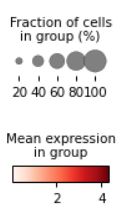

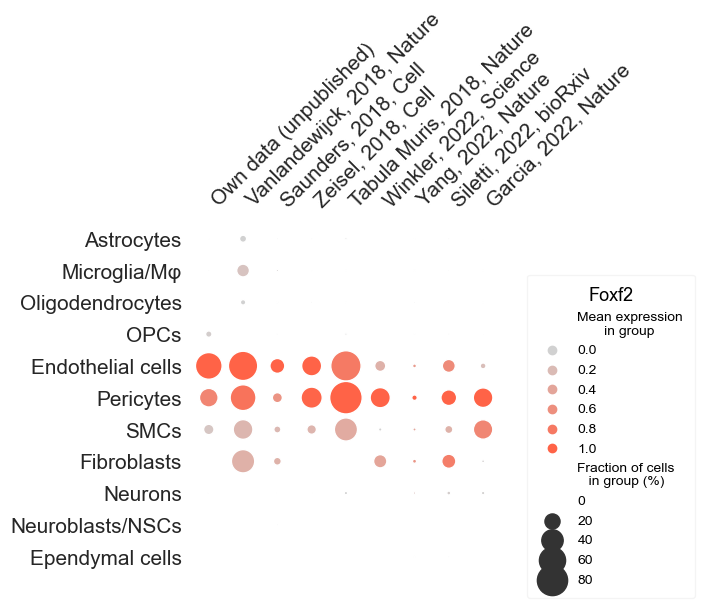

In [131]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.65
              ) 
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=15)
pl.set_yticklabels(fontsize=15)
pl.fig.set_size_inches(7.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True)
#sns.despine(bottom=True, left=True, top=False)


# position sns legend
leg = pl._legend
leg.set_bbox_to_anchor([1.5,0.53])
#leg.set_title("Foxf2")
leg.remove()

# Mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.85, bbox_to_anchor=(1.68,0.872), title="Foxf2", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);
plt.show()

Plot shows no dot if fraction of cells is 0

In [266]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_b.png', dpi=500)

In [267]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_b.svg', dpi=500)

## Cell Numbers

In [132]:
# Format table
all5=all2.set_index(['clusters','source'])['cell_number'].unstack().reset_index() # unmelt
# change row order to represent groupings
all5.index = all5.clusters
all5=all5.reindex(list(all2.clusters.unique()))
all5=all5.drop("clusters",axis=1)
#all4.sort_values("clusters")
all5 = all5.fillna(0)
all5 = all5.astype(int)
# add marginal frequencies
all5.loc["Total"] = all5.sum(skipna=True)
all5['Total'] = all5[list(all5.columns)].sum(axis=1)
all5

source,Own data (unpublished),"Vanlandewijck, 2018, Nature","Saunders, 2018, Cell","Zeisel, 2018, Cell","Tabula Muris, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Siletti, 2022, bioRxiv","Garcia, 2022, Nature",Total
clusters,,,,,,,,,,
Astrocytes,783,250,51571,19755,433,0,9943,163066,11954,257755
Microglia/Mφ,1360,14,6129,6744,4365,0,1142,91838,8164,119756
Oligodendrocytes,54,155,113209,26243,1186,0,8528,494966,29428,673769
OPCs,28,0,12252,733,202,0,1509,105734,5844,126302
Endothelial cells,338,1528,40105,2334,625,4950,24982,5165,2216,82243
Pericytes,92,1088,5342,4156,14,329,17561,3693,1564,33839
SMCs,95,297,7667,1575,132,41150,4669,1074,417,57076
Fibroblasts,0,86,3993,0,0,3721,2032,9156,783,19771
Neurons,753,0,399331,63512,196,0,933,2455885,23968,2944578


In [269]:
all5.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_number_of_cells.csv',sep=";")

## Looking at AV zonation

### Load data

In [220]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230227_Vanlandewijck2018_incl_zonation.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230227_Winkler2022_incl_zonation.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230227_Yang2022_incl_zonation.csv']

In [221]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [222]:
all.source.unique()

array(['Vanlandewijck2018', 'Winkler2022', 'Yang2022'], dtype=object)

In [223]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Microglia',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Fibromyocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells']

### Format

### Remove celltypes

In [224]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Leptomeningeal cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'Bergmann glial cells'] # -> Astrocytes
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'ECs_non_AV']

### Rename Oligos

In [225]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [226]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Microglia',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs']

In [227]:
all = all.replace("Microglia","Microglia/Mφ")

In [228]:
all = all.replace("Macrophages","Microglia/Mφ")

In [229]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [230]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Neurons',
 'OPCs']

### Complement missing celltypes 

In [246]:
all2 = all

In [247]:
# complement missing celltypes as NA rows

In [249]:
all_celltypes = pd.Series(all2.clusters2.unique())
all_celltypes

0           Astrocytes
1         ECs_Arterial
2        ECs_Capillary
3           ECs_Venous
4          Fibroblasts
5         Microglia/Mφ
6     Oligodendrocytes
7            Pericytes
8                 SMCs
9      Ependymal cells
10             Neurons
11                OPCs
dtype: object

In [250]:
all2.source.unique()

array(['Vanlandewijck2018', 'Winkler2022', 'Yang2022'], dtype=object)

In [251]:
all2.loc[len(all2)]

clusters2            Pericytes
mean_expression            1.0
fraction_of_cells     0.026878
gene                     FOXF2
source                Yang2022
organism                 Human
cell_number              17561
Name: 27, dtype: object

In [193]:
for s in all2.source.unique():
    # find cell types missing per source
    key_diff = set(all_celltypes).difference(all2[all2.source==s].clusters2)
    where_diff = all_celltypes.isin(key_diff)
    missing_celltypes=all_celltypes[where_diff]
    # append these to all2 as NA row
    for m in missing_celltypes:
        all2.loc[len(all2)] = [m,None,None,None,s,None,None]

#assert(len(all2) == len(all2.clusters2.unique())*len(all2.source.unique()))

In [194]:
len(all2.clusters2.unique())

12

In [195]:
len(all2.source.unique())

3

In [196]:
len(all2)

27

In [197]:
all2

,clusters2,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.000057,0.044000,Foxf2,Vanlandewijck2018,Mouse,250.0
1,ECs_Arterial,0.810197,0.816121,Foxf2,Vanlandewijck2018,Mouse,397.0
2,ECs_Capillary,1.000000,0.834568,Foxf2,Vanlandewijck2018,Mouse,405.0
3,ECs_Venous,0.707675,0.748322,Foxf2,Vanlandewijck2018,Mouse,298.0
5,Fibroblasts,0.253919,0.476744,Foxf2,Vanlandewijck2018,Mouse,86.0
6,Microglia/Mφ,0.108936,0.142857,Foxf2,Vanlandewijck2018,Mouse,14.0
7,Oligodendrocytes,0.000000,0.025806,Foxf2,Vanlandewijck2018,Mouse,155.0
8,Pericytes,0.738566,0.585478,Foxf2,Vanlandewijck2018,Mouse,1088.0
9,SMCs,0.213667,0.340067,Foxf2,Vanlandewijck2018,Mouse,297.0
10,ECs_Arterial,0.561976,0.136868,FOXF2,Winkler2022,Human,2886.0


### Set order of axes

In [252]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Neurons',
 'OPCs']

In [253]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022"])

In [254]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "ECs_Arterial", "ECs_Capillary", "ECs_Venous", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [255]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [256]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [257]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [258]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [259]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [260]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [261]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [262]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [263]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

### Heatmap

In [264]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [265]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_3644\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


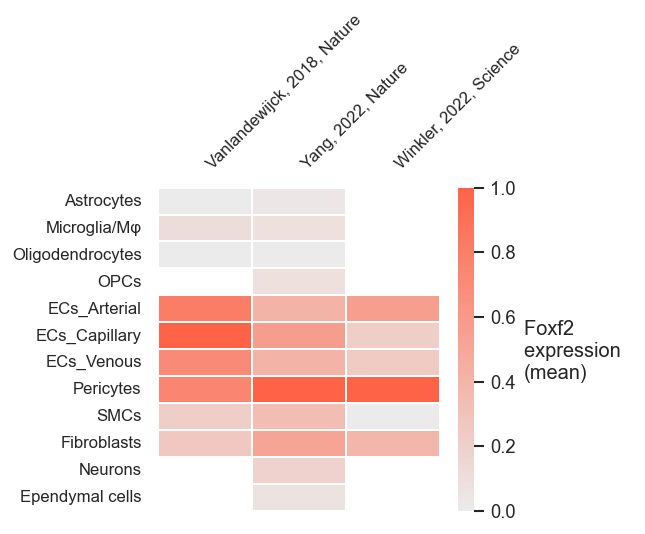

In [266]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title='Foxf2 \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [267]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_3644\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [268]:
#all2.columns = ['clusters', 'Mean', 'Fraction of cells', 'gene', 'source','organism', 'cell_number']

In [269]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [270]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

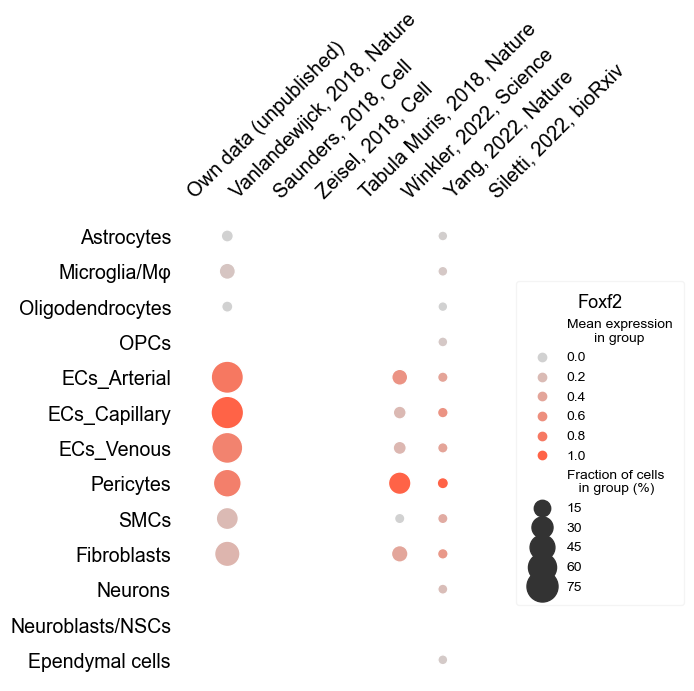

In [275]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(7.5,5.6)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)


# position sns legend
leg = pl._legend
leg.set_bbox_to_anchor([1.5,0.53])
#leg.set_title("Foxf2")
leg.remove();

# Mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.85, bbox_to_anchor=(1.68,0.872), title="Foxf2", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);
plt.show()

In [276]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_incl_AV_zonation.png', dpi=500)

In [277]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_incl_AV_zonation.svg', dpi=500)

## Cell Numbers

In [282]:
# Format table
all5=all2.set_index(['clusters','source'])['cell_number'].unstack().reset_index() # unmelt
# change row order to represent groupings
all5.index = all5.clusters
all5=all5.reindex(list(all2.clusters.unique()))
all5=all5.drop("clusters",axis=1)
#all4.sort_values("clusters")
all5 = all5.fillna(0)
all5 = all5.astype(int)
# add marginal frequencies
all5.loc["Total"] = all5.sum(skipna=True)
all5['Total'] = all5[list(all5.columns)].sum(axis=1)
all5

source,"Vanlandewijck, 2018, Nature","Yang, 2022, Nature","Winkler, 2022, Science",Total
clusters,,,,
Astrocytes,250,9943,0,10193
Microglia/Mφ,14,1142,0,1156
Oligodendrocytes,155,8528,0,8683
OPCs,0,1509,0,1509
ECs_Arterial,397,4486,2886,7769
ECs_Capillary,405,13357,165,13927
ECs_Venous,298,7139,1899,9336
Pericytes,1088,17561,329,18978
SMCs,297,4669,41150,46116


In [ ]:
all5.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_number_of_cells.csv',sep=";")

# Other genes: Tek

## Load data

In [178]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "2023*_Tek_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Tek_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230227_Tek_Vanlandewijck2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_TEK_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_TEK_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Tek_Heindl2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Tek_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_TE

In [179]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [180]:
all

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.002218,0.001063,Tek,Zeisel2018,Mouse,19755
1,Ependymal cells,0.011373,0.007047,Tek,Zeisel2018,Mouse,1419
2,Olfactory ensheathing cells,0.000000,0.000492,Tek,Zeisel2018,Mouse,2031
3,Pericytes,1.000000,0.374158,Tek,Zeisel2018,Mouse,4156
4,Endothelial cells,0.820371,0.280634,Tek,Zeisel2018,Mouse,2334
...,...,...,...,...,...,...,...
72,Microglia/Macrophages,0.003140,0.015808,Tek,TabulaMuris2018,Mouse,4365
73,Unknown,0.017804,0.039773,Tek,TabulaMuris2018,Mouse,176
74,Neuronal stem cells,0.000000,0.000000,Tek,TabulaMuris2018,Mouse,36
75,SMCs,0.022764,0.037879,Tek,TabulaMuris2018,Mouse,132


In [181]:
all.source.unique()

array(['Zeisel2018', 'Vanlandewijck2018', 'Winkler2022', 'Yang2022',
       'Heindl2022', 'Saunders2018', 'Siletti2022', 'TabulaMuris2018'],
      dtype=object)

In [182]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Olfactory ensheathing cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligos',
 'SMCs',
 'OPCs',
 'Leptomeningeal cells',
 'ECs',
 'Fibroblasts',
 'Microglia',
 'Fibromyocytes',
 'T cells',
 'Immune_Other',
 'Unknown',
 'Neurogenesis',
 'Choroid plexus epithelial cells',
 'Macrophages',
 'Neuronal stem cells']

## Format

### Remove celltypes

In [183]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']

### Rename Oligos

In [184]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [185]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'ECs',
 'Fibroblasts',
 'Microglia',
 'Neurogenesis',
 'Macrophages',
 'Neuronal stem cells']

In [186]:
all = all.replace("Microglia","Microglia/Mφ")

In [187]:
all = all.replace("Macrophages","Microglia/Mφ")

In [188]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [189]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'ECs',
 'Fibroblasts',
 'Neurogenesis',
 'Neuronal stem cells']

### Group Neuroblasts/Neuronal stem cells

In [190]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [191]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")

In [192]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
6,Neuroblasts/NSCs,0.000221,0.000549,Tek,Zeisel2018,Mouse,5466
50,Neuroblasts/NSCs,0.000000,0.000499,Tek,Saunders2018,Mouse,4008
74,Neuroblasts/NSCs,0.000000,0.000000,Tek,TabulaMuris2018,Mouse,36


### Rename ECs

In [193]:
# rename ECs to Endothelial cells

In [194]:
all2 = all

In [195]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [196]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Fibroblasts']

In [197]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [198]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [199]:
all2 = all2.sort_values("clusters")

### Rename studies

In [200]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.002218,0.001063,Tek,Zeisel2018,Mouse,19755
56,Astrocytes,0.003129,0.007764,TEK,Siletti2022,Human,163066
45,Astrocytes,0.001185,0.001202,Tek,Saunders2018,Mouse,51571
35,Astrocytes,0.000603,0.001277,Tek,Heindl2022,Mouse,783
24,Astrocytes,0.000000,0.008247,TEK,Yang2022,Human,9943
...,...,...,...,...,...,...,...
74,Neuroblasts/NSCs,0.000000,0.000000,Tek,TabulaMuris2018,Mouse,36
59,Ependymal cells,0.017392,0.025502,TEK,Siletti2022,Human,5882
26,Ependymal cells,0.052491,0.025989,TEK,Yang2022,Human,885
1,Ependymal cells,0.011373,0.007047,Tek,Zeisel2018,Mouse,1419


In [201]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [202]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [203]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [204]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [205]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [206]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [207]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [208]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [209]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [210]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [211]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12092\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


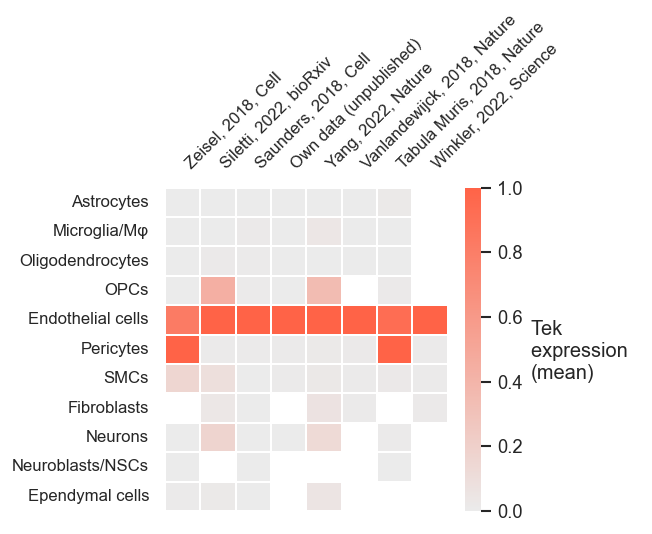

In [212]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title='Tek \nexpression \n(mean)', frameon=False)
    plt.show()

## Dotplot

In [213]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12092\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [214]:
#all2.columns = ['clusters', 'Mean', 'Fraction of cells', 'gene', 'source','organism', 'cell_number']

In [215]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [216]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

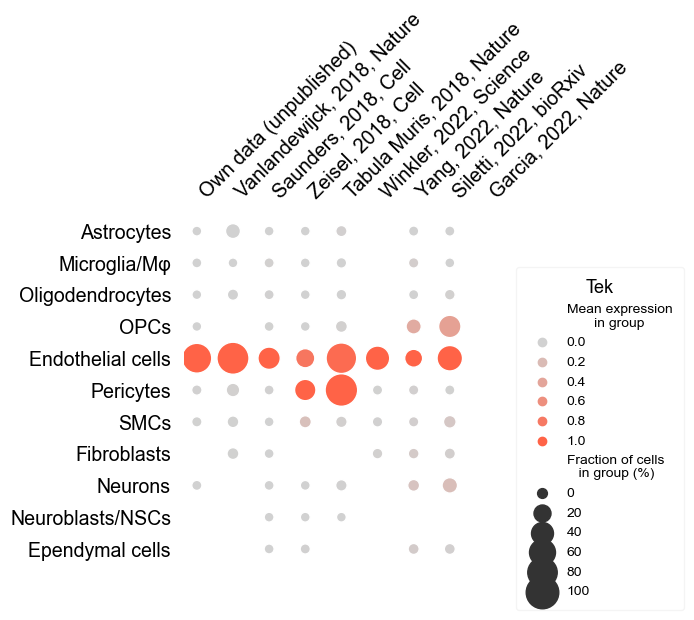

In [217]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(7.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)


# position sns legend
leg = pl._legend
leg.set_bbox_to_anchor([1.5,0.53])
#leg.set_title("Foxf2")
leg.remove();

# Mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.85, bbox_to_anchor=(1.68,0.872), title="Tek", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);
plt.show()

In [327]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_a.png', dpi=500)

In [328]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_a.svg', dpi=500)

In [218]:
# format legend as in scanpy.pl.dotplot() manually
# use colorbar from heatmap above

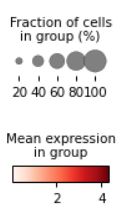

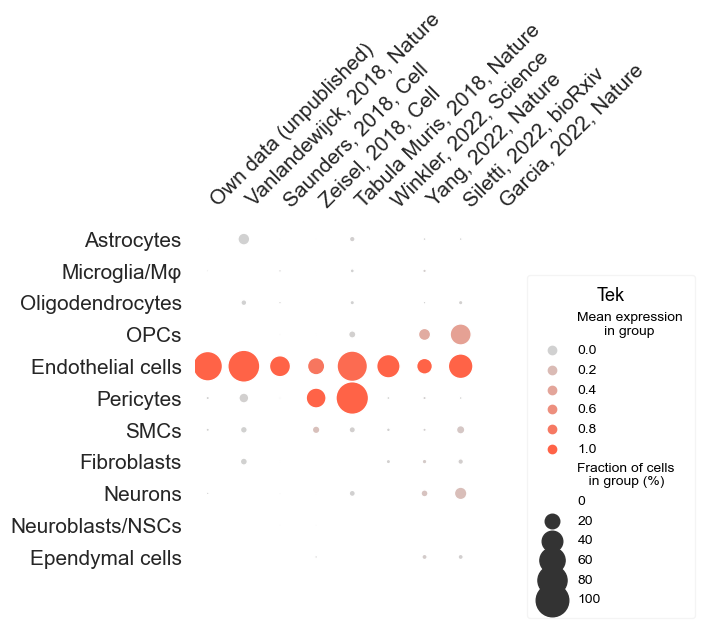

In [219]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.65
              ) 
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=15)
pl.set_yticklabels(fontsize=15)
pl.fig.set_size_inches(7.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True)
#sns.despine(bottom=True, left=True, top=False)


# position sns legend
leg = pl._legend
leg.set_bbox_to_anchor([1.5,0.53])
#leg.set_title("Foxf2")
leg.remove()

# Mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.85, bbox_to_anchor=(1.68,0.872), title="Tek", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);
plt.show()

Plot shows no dot if fraction of cells is 0

In [332]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_b.png', dpi=500)

In [333]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_b.svg', dpi=500)

# Other genes: Foxo1

## Load data

In [298]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "*_Foxo1_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_FOXO1_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230227_Foxo1_Vanlandewijck2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Foxo1_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_FOXO1_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Foxo1_Heindl2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_FOXO1_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\

In [299]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [300]:
all

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,ECs,1.000000,0.494949,FOXO1,Winkler2022,Human,4950
1,Fibroblasts,0.460878,0.349368,FOXO1,Winkler2022,Human,3721
2,Fibromyocytes,0.164828,0.218929,FOXO1,Winkler2022,Human,4353
3,Pericytes,0.000000,0.148936,FOXO1,Winkler2022,Human,329
4,SMCs,0.007659,0.163183,FOXO1,Winkler2022,Human,41150
...,...,...,...,...,...,...,...
72,Neurons,0.344222,0.102056,Foxo1,Saunders2018,Mouse,399331
73,OPCs,0.005404,0.020976,Foxo1,Saunders2018,Mouse,12252
74,Oligos,0.099744,0.045005,Foxo1,Saunders2018,Mouse,113209
75,Pericytes,0.109791,0.036316,Foxo1,Saunders2018,Mouse,5342


In [301]:
all.source.unique()

array(['Winkler2022', 'Vanlandewijck2018', 'Zeisel2018', 'Yang2022',
       'Heindl2022', 'Siletti2022', 'TabulaMuris2018', 'Saunders2018'],
      dtype=object)

In [302]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia',
 'Oligos',
 'Ependymal cells',
 'Olfactory ensheathing cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Leptomeningeal cells',
 'T cells',
 'Immune_Other',
 'Unknown',
 'Choroid plexus epithelial cells',
 'Macrophages',
 'Neuronal stem cells',
 'Neurogenesis']

## Format

### Remove celltypes

In [303]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']

### Rename Oligos

In [304]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [305]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia',
 'Oligodendrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Macrophages',
 'Neuronal stem cells',
 'Neurogenesis']

In [306]:
all = all.replace("Microglia","Microglia/Mφ")

In [307]:
all = all.replace("Macrophages","Microglia/Mφ")

In [308]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [309]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'OPCs',
 'Neuronal stem cells',
 'Neurogenesis']

### Group Neuroblasts/Neuronal stem cells

In [310]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [311]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")

In [312]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
18,Neuroblasts/NSCs,0.032349,0.039517,Foxo1,Zeisel2018,Mouse,5466
63,Neuroblasts/NSCs,0.147154,0.305556,Foxo1,TabulaMuris2018,Mouse,36
71,Neuroblasts/NSCs,0.055644,0.027944,Foxo1,Saunders2018,Mouse,4008


### Rename ECs

In [313]:
# rename ECs to Endothelial cells

In [314]:
all2 = all

In [315]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [316]:
all2.clusters.unique().tolist()

['Endothelial cells',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'OPCs']

In [317]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [318]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [319]:
all2 = all2.sort_values("clusters")

### Rename studies

In [320]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
35,Astrocytes,0.461388,0.292465,Foxo1,Heindl2022,Mouse,783
5,Astrocytes,0.493353,0.308000,Foxo1,Vanlandewijck2018,Mouse,250
24,Astrocytes,0.859098,0.397063,FOXO1,Yang2022,Human,9943
45,Astrocytes,0.432923,0.480744,FOXO1,Siletti2022,Human,163066
12,Astrocytes,0.269911,0.089344,Foxo1,Zeisel2018,Mouse,19755
...,...,...,...,...,...,...,...
71,Neuroblasts/NSCs,0.055644,0.027944,Foxo1,Saunders2018,Mouse,4008
13,Ependymal cells,0.635456,0.288231,Foxo1,Zeisel2018,Mouse,1419
68,Ependymal cells,1.000000,0.201286,Foxo1,Saunders2018,Mouse,2022
26,Ependymal cells,0.369467,0.281356,FOXO1,Yang2022,Human,885


In [321]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [322]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [323]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [324]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [325]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [326]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [327]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [328]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [329]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [330]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [331]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12092\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


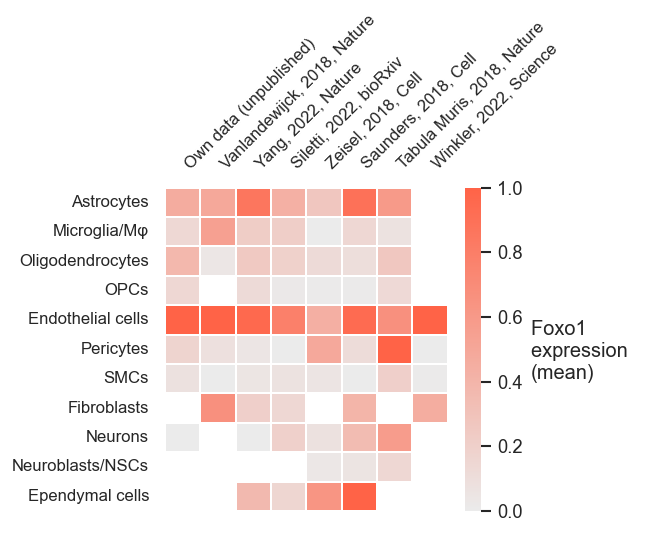

In [332]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title='Foxo1 \nexpression \n(mean)', frameon=False)
    plt.show()

## Dotplot

In [333]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12092\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [334]:
#all2.columns = ['clusters', 'Mean', 'Fraction of cells', 'gene', 'source','organism', 'cell_number']

In [335]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [336]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

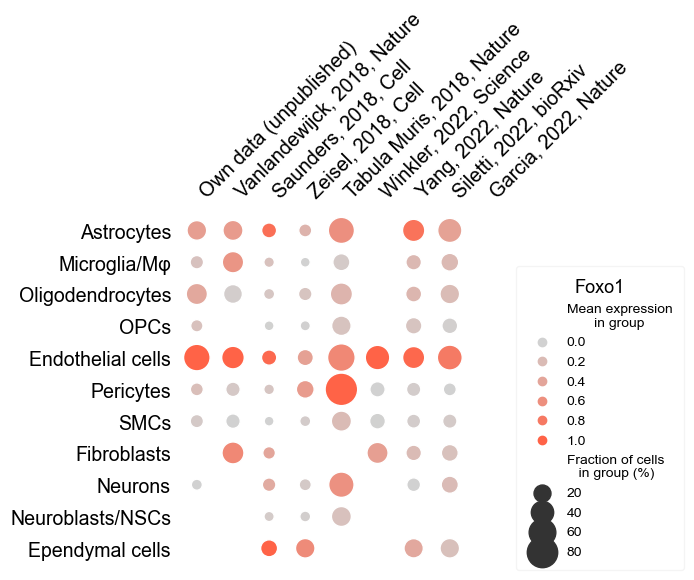

In [337]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(7.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)


# position sns legend
leg = pl._legend
leg.set_bbox_to_anchor([1.5,0.53])
#leg.set_title("Foxf2")
leg.remove();

# Mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.85, bbox_to_anchor=(1.68,0.872), title="Foxo1", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);
plt.show()

In [327]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_a.png', dpi=500)

In [328]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_a.svg', dpi=500)

In [329]:
# format legend as in scanpy.pl.dotplot() manually
# use colorbar from heatmap above

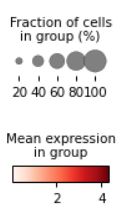

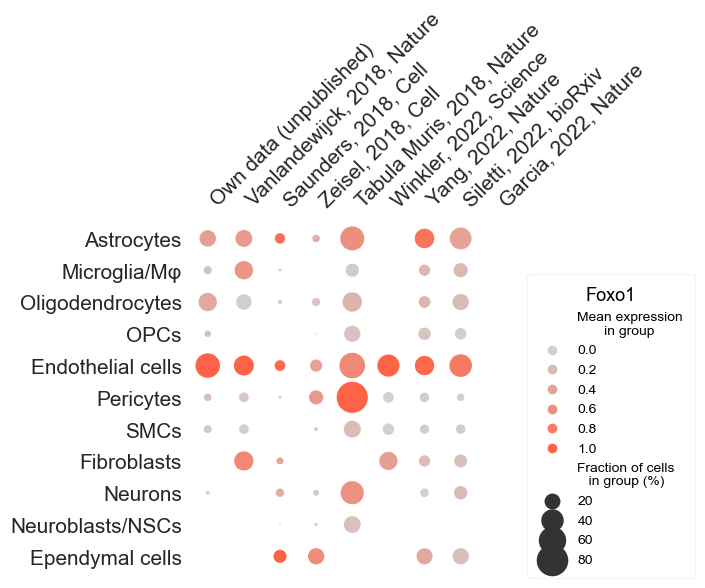

In [338]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.65
              ) 
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=15)
pl.set_yticklabels(fontsize=15)
pl.fig.set_size_inches(7.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True)
#sns.despine(bottom=True, left=True, top=False)


# position sns legend
leg = pl._legend
leg.set_bbox_to_anchor([1.5,0.53])
#leg.set_title("Foxf2")
leg.remove()

# Mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.85, bbox_to_anchor=(1.68,0.872), title="Foxo1", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);
plt.show()

Plot shows no dot if fraction of cells is 0

In [332]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_b.png', dpi=500)

In [333]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_b.svg', dpi=500)

# Other genes: Nos3

## Load data

In [342]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "*_Nos3_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230227_Nos3_Vanlandewijck2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Nos3_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_NOS3_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_NOS3_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Nos3_Heindl2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Nos3_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230

In [343]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [344]:
all.source.unique()

array(['Vanlandewijck2018', 'Zeisel2018', 'Winkler2022', 'Yang2022',
       'Heindl2022', 'Saunders2018', 'Siletti2022', 'TabulaMuris2018'],
      dtype=object)

In [345]:
all.clusters.unique().tolist()

['Astrocytes',
 'ECs',
 'Fibroblasts',
 'Microglia',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Olfactory ensheathing cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Leptomeningeal cells',
 'Fibromyocytes',
 'T cells',
 'Immune_Other',
 'Unknown',
 'Neurogenesis',
 'Choroid plexus epithelial cells',
 'Macrophages',
 'Neuronal stem cells']

## Format

### Remove celltypes

In [346]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']

### Rename Oligos

In [347]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [348]:
all.clusters.unique().tolist()

['Astrocytes',
 'ECs',
 'Fibroblasts',
 'Microglia',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'OPCs',
 'Neurogenesis',
 'Macrophages',
 'Neuronal stem cells']

In [349]:
all = all.replace("Microglia","Microglia/Mφ")

In [350]:
all = all.replace("Macrophages","Microglia/Mφ")

In [351]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [352]:
all.clusters.unique().tolist()

['Astrocytes',
 'ECs',
 'Fibroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'OPCs',
 'Neurogenesis',
 'Neuronal stem cells']

### Group Neuroblasts/Neuronal stem cells

In [353]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [354]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")

In [355]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
13,Neuroblasts/NSCs,0.039580,0.010062,Nos3,Zeisel2018,Mouse,5466
50,Neuroblasts/NSCs,0.017165,0.003743,Nos3,Saunders2018,Mouse,4008
74,Neuroblasts/NSCs,0.014062,0.055556,Nos3,TabulaMuris2018,Mouse,36


### Rename ECs

In [356]:
# rename ECs to Endothelial cells

In [357]:
all2 = all

In [358]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [359]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Fibroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'OPCs']

In [360]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [361]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [362]:
all2 = all2.sort_values("clusters")

### Rename studies

In [363]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.000000,0.056000,Nos3,Vanlandewijck2018,Mouse,250
56,Astrocytes,0.001526,0.000803,NOS3,Siletti2022,Human,163066
45,Astrocytes,0.015930,0.003820,Nos3,Saunders2018,Mouse,51571
35,Astrocytes,0.031923,0.024266,Nos3,Heindl2022,Mouse,783
24,Astrocytes,0.021332,0.002816,NOS3,Yang2022,Human,9943
...,...,...,...,...,...,...,...
74,Neuroblasts/NSCs,0.014062,0.055556,Nos3,TabulaMuris2018,Mouse,36
59,Ependymal cells,0.038575,0.014111,NOS3,Siletti2022,Human,5882
47,Ependymal cells,0.093670,0.022750,Nos3,Saunders2018,Mouse,2022
8,Ependymal cells,0.238638,0.062016,Nos3,Zeisel2018,Mouse,1419


In [364]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [365]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [366]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [367]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [368]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [369]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [370]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [371]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [372]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [373]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [374]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12092\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


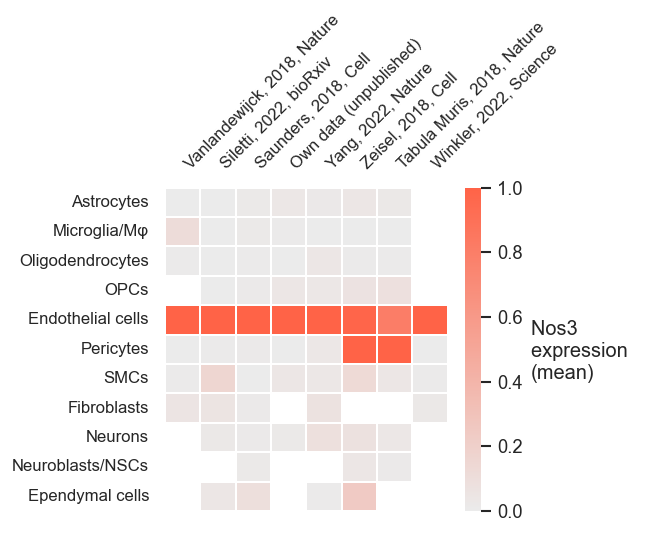

In [375]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title='Nos3 \nexpression \n(mean)', frameon=False)
    plt.show()

## Dotplot

In [376]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12092\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [377]:
#all2.columns = ['clusters', 'Mean', 'Fraction of cells', 'gene', 'source','organism', 'cell_number']

In [378]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [379]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

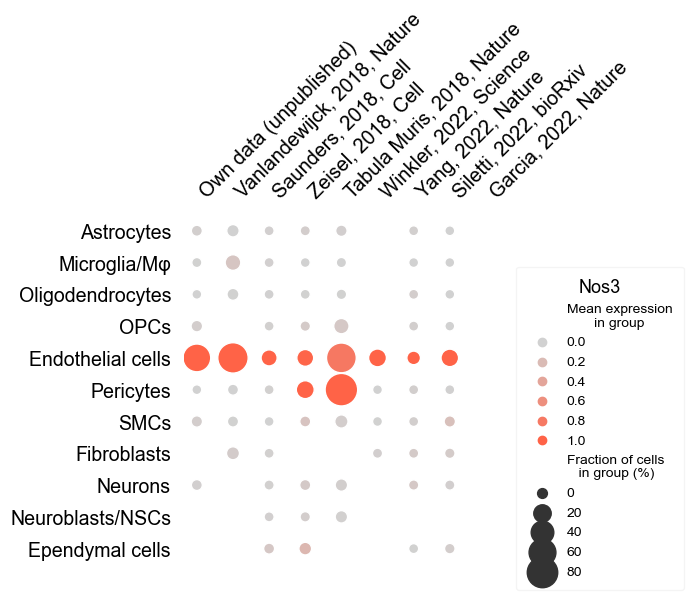

In [381]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(7.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)


# position sns legend
leg = pl._legend
leg.set_bbox_to_anchor([1.5,0.53])
#leg.set_title("Foxf2")
leg.remove();

# Mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.85, bbox_to_anchor=(1.68,0.872), title="Nos3", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);
plt.show()

In [327]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_a.png', dpi=500)

In [328]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_a.svg', dpi=500)

In [329]:
# format legend as in scanpy.pl.dotplot() manually
# use colorbar from heatmap above

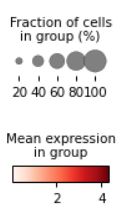

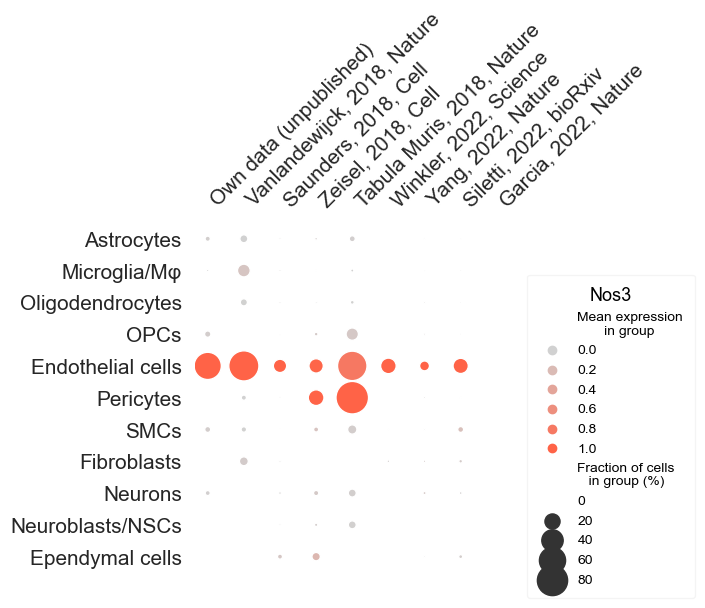

In [382]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.65
              ) 
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=15)
pl.set_yticklabels(fontsize=15)
pl.fig.set_size_inches(7.5,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True)
#sns.despine(bottom=True, left=True, top=False)


# position sns legend
leg = pl._legend
leg.set_bbox_to_anchor([1.5,0.53])
#leg.set_title("Foxf2")
leg.remove()

# Mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.85, bbox_to_anchor=(1.68,0.872), title="Nos3", # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);
plt.show()

Plot shows no dot if fraction of cells is 0

In [332]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_b.png', dpi=500)

In [333]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_Tek_by_celltype_b.svg', dpi=500)

# Session Info

In [796]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asciitree           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
cloudpickle         2.0.0
colorama            0.4.5
cycler              0.10.0
cython_runtime      NA
dask                2021.11.0
dateutil            2.8.2
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
fasteners           NA
fsspec              2021.11.0
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.9.8
ipykernel           5.5.5
ipython_genutils    0.2.0
ipywidgets          7.7.1
jedi                0.18.1
jinja2              3.0.3
joblib              1.1.0
jupyter_server      1.13.5
kiwisolver          1.4.4
leidenalg           0.8.8
llvmlite            0.39.0
louvain             0.7.1
markupsafe          2.1.1
matplotlib          3.5.3
mpl_toolkits        NA
natsort             8.1.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba 

---
# Export HTML

Incl. TOC, via nbconvert from jupyter notebook, details see https://stackoverflow.com/a/59286150.

Save, then run

In [800]:
# For bash
! cp combine_foxf2_results.ipynb HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb # rename in temp copy
! jupyter nbconvert HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb --to html_toc # export
# Append `--ExtractOutputPreprocessor.enabled=False` to get a single html file instead of a separate directory for images
! rm HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb # delete temp copy

[NbConvertApp] Converting notebook HTMLs/20221104_combine_foxf2_results.ipynb to html_toc
[NbConvertApp] Support files will be in 20221104_combine_foxf2_results_files/
[NbConvertApp] Making directory HTMLs/20221104_combine_foxf2_results_files
[NbConvertApp] Making directory HTMLs/20221104_combine_foxf2_results_files
[NbConvertApp] Making directory HTMLs/20221104_combine_foxf2_results_files
[NbConvertApp] Making directory HTMLs/20221104_combine_foxf2_results_files
[NbConvertApp] Making directory HTMLs/20221104_combine_foxf2_results_files
[NbConvertApp] Writing 401891 bytes to HTMLs/20221104_combine_foxf2_results.html


In [114]:
# pip install in current Jupyter kernel
import sys
!{sys.executable} -m pip install colorspacious 

# Outdated

### Merge EC zonation

In [231]:
# Outdated. Previously used to calculate weighted mean expression on ECs based on data from ECs split into zonation clusters. Now zonation clusters were merged already in anndata object, which is more accurate.

In [232]:
# merge EC zonation as weighted mean expression 
# in Yang2022 Winkler2022 Vanlandewijck2018

In [233]:
#Vanlandewijck2018 = all[all.source == "Vanlandewijck2018"]
#Vanlandewijck2018

In [234]:
# rename
#Vanlandewijck2018["clusters"] = Vanlandewijck2018.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Vanlandewijck2018

In [235]:
#Winkler2022 = all[all.source == "Winkler2022"]
#Winkler2022

In [236]:
# rename
#Winkler2022["clusters"] = Winkler2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Winkler2022

In [237]:
# Yang2022 = all[all.source == "Yang2022"]
# Yang2022

In [238]:
# Yang2022["clusters"] = Yang2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
# Yang2022

In [239]:
# remove original rows, then append new ones

In [240]:
# all.loc[Yang2022.index[0]:Yang2022.index[-1],:] = None
# all.loc[Winkler2022.index[0]:Winkler2022.index[-1],:] = None
# all.loc[Vanlandewijck2018.index[0]:Vanlandewijck2018.index[-1],:] = None
# all = all.dropna()

In [241]:
# compute new rows via weighted mean

In [242]:
# wm = lambda x: np.average(x, weights=Yang2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Yang2022_weighted_mean = Yang2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Yang2022_weighted_mean=Yang2022_weighted_mean.reset_index()[Yang2022.columns]
# Yang2022_weighted_mean

Contains correct weighted mean of mean_expression and fraction_of_cell (double checked)

In [243]:
# wm = lambda x: np.average(x, weights=Vanlandewijck2018.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Vanlandewijck2018_weighted_mean = Vanlandewijck2018.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Vanlandewijck2018_weighted_mean=Vanlandewijck2018_weighted_mean.reset_index()[Vanlandewijck2018.columns]
# Vanlandewijck2018_weighted_mean

In [244]:
# wm = lambda x: np.average(x, weights=Winkler2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Winkler2022_weighted_mean = Winkler2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Winkler2022_weighted_mean=Winkler2022_weighted_mean.reset_index()[Winkler2022.columns]
# Winkler2022_weighted_mean

In [245]:
# # append to all
# all2 = pd.concat([all, Winkler2022_weighted_mean, Yang2022_weighted_mean, Vanlandewijck2018_weighted_mean], axis=0)
# all2 = all2.reset_index().drop("index",axis=1)

### Complement missing celltypes 

In [106]:
# complement missing celltypes as NA rows

In [107]:
# all_celltypes = pd.Series(all2.clusters.unique())
# for s in all2.source.unique():
#     # find cell types missing per source
#     key_diff = set(all_celltypes).difference(all2[all2.source==s].clusters)
#     where_diff = all_celltypes.isin(key_diff)
#     missing_celltypes=all_celltypes[where_diff]
#     # append these to all2 as NA row
#     for m in missing_celltypes:
#         all2.loc[len(all2)] = [m,None,None,None,s,None,None]

# assert(len(all2) == len(all2.clusters.unique())*len(all2.source.unique()))